# Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

## Common part

In [2]:
# Common imports
from sklearn.datasets import load_iris
import numpy as np
from numpy import zeros
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Import for Decision Tree
from sklearn import tree

# will be used to separate training and test
from sklearn.model_selection import cross_val_score

# Import for Clustering
from sklearn import neighbors
from sklearn.model_selection import train_test_split

# Common dataset: Iris
iris = load_iris()

Some details about the Iris dataset

In [3]:
print("Features: \t\t {0}".format(iris.feature_names))
print("DataFrame shape: \t {0}".format(iris.data.shape))

Features: 		 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
DataFrame shape: 	 (150, 4)


## Classification with Decision Tree

The following cell shows the program training a decision tree and its results in preciction 

In [4]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300,
                                  min_samples_leaf=5,
                                  class_weight={0: 1, 1: 1, 2: 1})
clf = clf.fit(iris.data, iris.target)

# score will be the accuracy
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # TODO: capire percè cv=5
print("Accuracy: {0}".format(scores))

print("\nFeature\t\t\tAccuracy:")
for i in range(len(iris.feature_names)):
    print("{0}\t{1}".format(iris.feature_names[i], scores[i]))

Accuracy: [0.96666667 1.         0.86666667 0.86666667 1.        ]

Feature			Accuracy:
sepal length (cm)	0.9666666666666667
sepal width (cm)	1.0
petal length (cm)	0.8666666666666667
petal width (cm)	0.8666666666666667


## Classification with KNN

The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [5]:
n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy

print("Accuracy: {0}\n".format(scores))

# shows the model predictions
print("Model predictions:\n")
for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted=clf_knn.predict(instance)[0]
    if iris.target[i] == predicted:
        print("{0}\tok\t{1}".format(i,iris.target_names[iris.target[i]]))
    else:
        print("{0}\terror\t\tpredicted class: {1}, real class: {2}".format(i,iris.target_names[predicted], iris.target_names[iris.target[i]]))
        #print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))

Accuracy: [0.93333333 1.         1.         0.96666667 1.        ]

Model predictions:

0	ok	setosa
1	ok	setosa
2	ok	setosa
3	ok	setosa
4	ok	setosa
5	ok	setosa
6	ok	setosa
7	ok	setosa
8	ok	setosa
9	ok	setosa
10	ok	setosa
11	ok	setosa
12	ok	setosa
13	ok	setosa
14	ok	setosa
15	ok	setosa
16	ok	setosa
17	ok	setosa
18	ok	setosa
19	ok	setosa
20	ok	setosa
21	ok	setosa
22	ok	setosa
23	ok	setosa
24	ok	setosa
25	ok	setosa
26	ok	setosa
27	ok	setosa
28	ok	setosa
29	ok	setosa
30	ok	setosa
31	ok	setosa
32	ok	setosa
33	ok	setosa
34	ok	setosa
35	ok	setosa
36	ok	setosa
37	ok	setosa
38	ok	setosa
39	ok	setosa
40	ok	setosa
41	ok	setosa
42	ok	setosa
43	ok	setosa
44	ok	setosa
45	ok	setosa
46	ok	setosa
47	ok	setosa
48	ok	setosa
49	ok	setosa
50	ok	versicolor
51	ok	versicolor
52	ok	versicolor
53	ok	versicolor
54	ok	versicolor
55	ok	versicolor
56	ok	versicolor
57	ok	versicolor
58	ok	versicolor
59	ok	versicolor
60	ok	versicolor
61	ok	versicolor
62	ok	versicolor
63	ok	versicolor
64	ok	versicolor
65	ok	versicolor


In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [6]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

for i in range(len(iris.target)):
    instance = (iris.data[i,:]).reshape(1, -1)
    predicted2 = clf_knn2.predict(instance)[0]
    if iris.target[i] == predicted2:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
print("\nClassification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicolor
68 ok versicolor
69 ok versicolor
70 ok versicolor
71 

The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k-neighbors={0}\taccuracy={1}".format(n_neighbors, clf_knn3.score(X_test, y_test)))

k-neighbors=1	accuracy=0.9166666666666666
k-neighbors=2	accuracy=0.9166666666666666
k-neighbors=3	accuracy=0.9333333333333333
k-neighbors=4	accuracy=0.9166666666666666
k-neighbors=5	accuracy=0.95
k-neighbors=6	accuracy=0.9333333333333333
k-neighbors=7	accuracy=0.9666666666666667
k-neighbors=8	accuracy=0.9333333333333333
k-neighbors=9	accuracy=0.9666666666666667
k-neighbors=10	accuracy=0.9666666666666667
k-neighbors=11	accuracy=0.9666666666666667
k-neighbors=12	accuracy=0.9666666666666667
k-neighbors=13	accuracy=0.9666666666666667
k-neighbors=14	accuracy=0.95
k-neighbors=15	accuracy=0.95
k-neighbors=16	accuracy=0.9166666666666666
k-neighbors=17	accuracy=0.9333333333333333
k-neighbors=18	accuracy=0.9166666666666666
k-neighbors=19	accuracy=0.9166666666666666
k-neighbors=20	accuracy=0.9166666666666666
k-neighbors=21	accuracy=0.9166666666666666
k-neighbors=22	accuracy=0.9166666666666666
k-neighbors=23	accuracy=0.9166666666666666
k-neighbors=24	accuracy=0.9
k-neighbors=25	accuracy=0.91666666

Best k = 7
Best accuracy = 0.9666666666666667


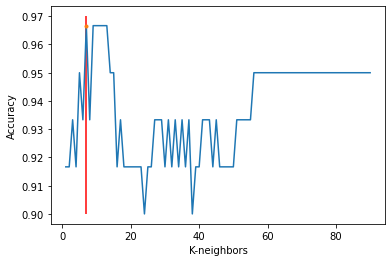

In [8]:
print("Best k = {0}".format(best_k))
print("Best accuracy = {0}".format(best_accuracy))

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))
plt.xlabel('K-neighbors')
plt.ylabel('Accuracy')

plt.vlines(best_k, 0.90, 0.97, colors='r', linestyles='solid', label='')
plt.plot(np.arange(1,len(y_train)+1),A)
plt.plot(best_k, best_accuracy, marker=".")

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k n

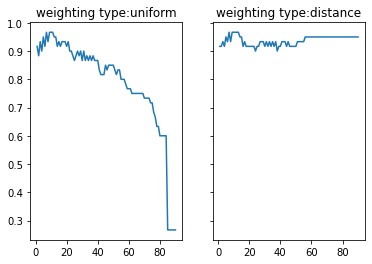

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)


 weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k

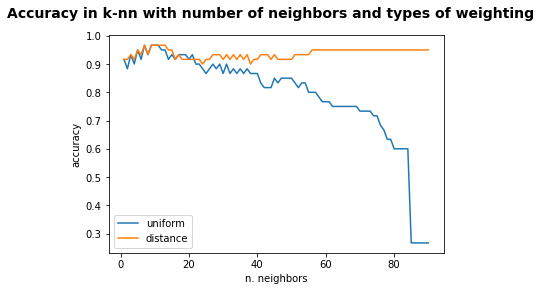

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


## TODO: your work!

Plot the Iris dataset, in 2-D, with a red color for Setosa, blue for Versicolor and green for Virginica.


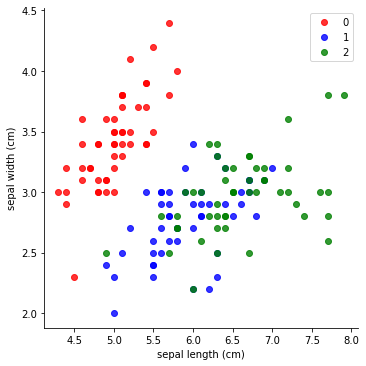

In [30]:
import seaborn as sns

df = load_iris(as_frame=True)

new = df.data.copy()
new["target"] = df.target
#new["ratio"] = new["sepal length (cm)"] / new["sepal width (cm)"]

sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", data=new, hue="target", palette=["red", "blue", "green"], fit_reg=False, legend=False)

plt.legend()
plt.show()

Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


Different rows:

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
77                 6.7               3.0                5.0               1.7   
83                 6.0               2.7                5.1               1.6   
106                4.9               2.5                4.5               1.7   
138                6.0               3.0                4.8               1.8   

     target  prediction1  
77        1            2  
83        1            2  
106       2            1  
138       2            1  



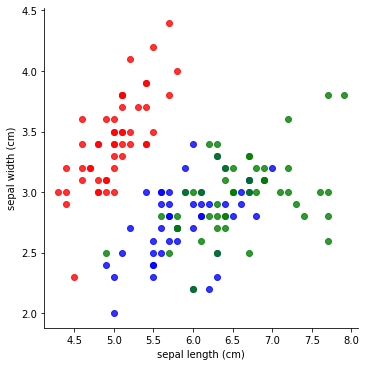

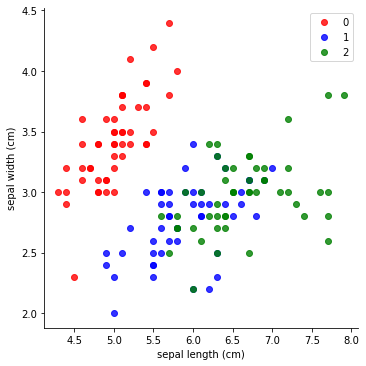

In [42]:
import seaborn as sns

# apply fitted model "clf" to the test set 
#predicted_y_distance = clf_knn_distance.predict(iris.data)
predicted_y = clf_knn.predict(iris.data)

new["prediction1"] = predicted_y
different_rows = new[new['target'] != new['prediction1']]
print("Different rows:\n\n{0}\n".format(different_rows))

sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", data=new, hue="target", palette=["red", "blue", "green"], fit_reg=False, legend=False)
sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", data=new, hue="prediction1", palette=["red", "blue", "green"], fit_reg=False, legend=False)

plt.legend()
plt.show()

In the following, extend the above exercize on k-nn using a kernel function  
K(x,y) for the distances computation, such that distance(x,y)=1-K(x,y).    Use a Gaussian-like (or Radial Basis Function) kernel K(x,y)=exp(-gamma(x-y)^2), with gamma the inverse of the sigma squared variance, that must be tuned to the best value according to the accuracy reached by the k-nn, with k=7 (similarly as done with the previous example on tuning the parameter n_neightbors).

In [ ]:
import math
from sklearn.metrics import accuracy_score
from scipy.optimize import fmin_bfgs


# x-y is a vector, its elevation to power equals the scalar product for itself

def norm_2(x: np.array) -> np.array: 
    return np.linalg.norm(x, ord=2)

def radialBasisFunction(x:np.array, y:np.array, gamma):
    K = norm_2(x - y)
    return math.exp(-np.dot(K, K) * gamma)

# Here func is a function which takes two one-dimensional numpy arrays, and returns a distance
def euclideRBFKernel(x:np.array, y:np.array, g):
    p_x = radialBasisFunction(x, x, g)
    p_xy = radialBasisFunction(x, y, g)
    p_y = radialBasisFunction(y, y, g)
    return  np.sqrt((p_x) - ( 2*p_xy ) + ( p_y))



def optimizeGamma(gamma: float):
    diction = {"g": gamma}
    knn_rbf = neighbors.KNeighborsClassifier(7, metric= euclideRBFKernel,       metric_params=diction)
    knn_rbf.fit(X_train, y_train)
    y_predicted = knn_rbf.predict(X_test)
    print(accuracy_score(y_predicted, y_test))
    print(gamma)
    print("------------------")
    return 1 - accuracy_score(y_predicted, y_test)

gamma = 0.0000000000002
gamma = fmin_bfgs(optimizeGamma, gamma, epsilon=1, maxiter=100)
print(gamma)